In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from scipy.stats import expon, laplace

# Read the heart-diseases.csv file
df = pd.read_csv("C:/Users/Admin/Desktop/project1/heart-diseases.csv")

In [3]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Display the first few rows and the structure of the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


(None,
    age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
 0   63   3       145   233    1        0      150      0      2.3      0   0   
 1   37   2       130   250    0        1      187      0      3.5      0   0   
 2   41   1       130   204    0        0      172      0      1.4      2   0   
 3   56   1       120   236    0        1      178      0      0.8      2   0   
 4   57   0       120   354    0        1      163      1      0.6      2   0   
 
    thal  target  
 0     1       1  
 1     2       1  
 2     2       1  
 3     2       1  
 4     2       1  )

In [21]:
# Handling missing values by filling them with column means
heart_data.fillna(heart_data.mean(), inplace=True)

# Encoding categorical variables
heart_data['cp'] = heart_data['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})
heart_data['fbs'] = heart_data['fbs'].map({0: 'false', 1: 'true'})
heart_data['restecg'] = heart_data['restecg'].map({0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
heart_data['exang'] = heart_data['exang'].map({0: 'no', 1: 'yes'})
heart_data['thal'] = heart_data['thal'].map({1: 'normal', 2: 'fixed defect', 3: 'reversible defect'})

# Normalizing numerical values
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
heart_data[numerical_columns] = scaler.fit_transform(heart_data[numerical_columns])

# Display the first few rows of the preprocessed dataset
heart_data.head()

NameError: name 'heart_data' is not defined

In [ ]:
# Handle missing values
df.isnull().sum()

In [6]:
# Descrption of the dataset
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Hypothetical dataset for demonstration
data = {
    'feature1': np.random.normal(loc=50, scale=10, size=100),
    'feature2': np.random.normal(loc=60, scale=15, size=100),
    'feature3': np.random.normal(loc=30, scale=5, size=100),
    'feature4': np.random.normal(loc=40, scale=20, size=100),
    'feature5': np.random.normal(loc=70, scale=25, size=100)
}
features = df.columns[:5]  # Only taking the first five features

In [8]:
# Function to apply Laplace mechanism
def apply_laplace_mechanism(data, sensitivity, epsilon=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, size=len(data))
    return data + noise

In [9]:
# Function to apply Exponential mechanism
def apply_exponential_mechanism(data, sensitivity, epsilon=1.0):
    scale = sensitivity / epsilon
    noise = np.random.exponential(scale, size=len(data))
    return data + noise


In [10]:
# Function to calculate mean, median, and standard deviation
def calculate_mean_median_std(data):
    mean_value = np.mean(data)
    median_value = np.median(data)
    std_value = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
    return mean_value, median_value, std_value

In [11]:
# Initializing storage for combined statistics
combined_stats = []


In [12]:
# Looping through each of the first five features to calculate statistics
for feature in features:
    original_data = df[feature].dropna()  # Handling potential NaN values
    
    # Applying noise mechanisms
    noisy_data_laplace = apply_laplace_mechanism(original_data, 1)
    noisy_data_exponential = apply_exponential_mechanism(original_data, 1)
    
    # Calculating statistics
    mean_original, median_original, std_original = calculate_mean_median_std(original_data)
    mean_laplace, median_laplace, std_laplace = calculate_mean_median_std(noisy_data_laplace)
    mean_exponential, median_exponential, std_exponential = calculate_mean_median_std(noisy_data_exponential)
    
    # Storing combined statistics
    combined_stats.append({
        'Feature': feature,
        'Type': 'Original',
        'Mean': mean_original,
        'Median': median_original,
        'Standard Deviation': std_original
    })
    combined_stats.append({
        'Feature': feature,
        'Type': 'Laplace Noise',
        'Mean': mean_laplace,
        'Median': median_laplace,
        'Standard Deviation': std_laplace
    })
    combined_stats.append({
        'Feature': feature,
        'Type': 'Exponential Noise',
        'Mean': mean_exponential,
        'Median': median_exponential,
        'Standard Deviation': std_exponential
    })

In [13]:
# Converting the combined statistics into a DataFrame for easier handling in plotting
combined_stats_df = pd.DataFrame(combined_stats)

In [14]:
# Converting the combined statistics into a DataFrame for easier handling in plotting
combined_stats_df = pd.DataFrame(combined_stats)

In [15]:
# Initialize storage for MSE and RMSE results
mse_rmse_results = []

# Looping through each feature to calculate MSE and RMSE for Laplace and Exponential noise data
for feature in features:
    original_data = df[feature].to_numpy()
    laplace_noised_data = apply_laplace_mechanism(original_data, 1)
    exponential_noised_data = apply_exponential_mechanism(original_data, 1)

    # Calculating MSE and RMSE for Laplace noise
    mse_laplace = mean_squared_error(original_data, laplace_noised_data)
    rmse_laplace = np.sqrt(mse_laplace)
    
    # Calculating MSE and RMSE for Exponential noise
    mse_exponential = mean_squared_error(original_data, exponential_noised_data)
    rmse_exponential = np.sqrt(mse_exponential)

    # Storing the results
    mse_rmse_results.append({
        'Feature': feature,
        'Noise Type': 'Laplace',
        'MSE': mse_laplace,
        'RMSE': rmse_laplace
    })
    mse_rmse_results.append({
        'Feature': feature,
        'Noise Type': 'Exponential',
        'MSE': mse_exponential,
        'RMSE': rmse_exponential
    })

In [16]:
# Converting the results into a DataFrame for easy visualization
mse_rmse_results_df = pd.DataFrame(mse_rmse_results)


In [17]:
# Displaying the MSE and RMSE results in a table
mse_rmse_results_df


,Feature,Noise Type,MSE,RMSE
0,age,Laplace,1.850667,1.360392
1,age,Exponential,2.266907,1.505625
2,cp,Laplace,2.343221,1.530758
3,cp,Exponential,1.962158,1.400770
4,trestbps,Laplace,1.951019,1.396789
5,trestbps,Exponential,1.765031,1.328545
6,chol,Laplace,1.875898,1.369634
7,chol,Exponential,1.880562,1.371336
8,fbs,Laplace,1.576108,1.255431
9,fbs,Exponential,1.933788,1.390607


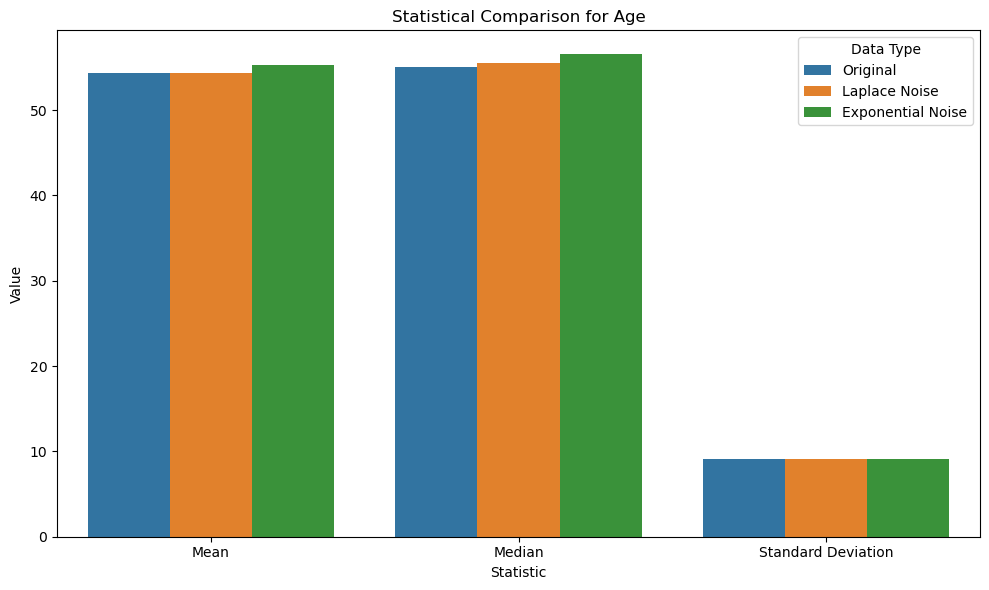

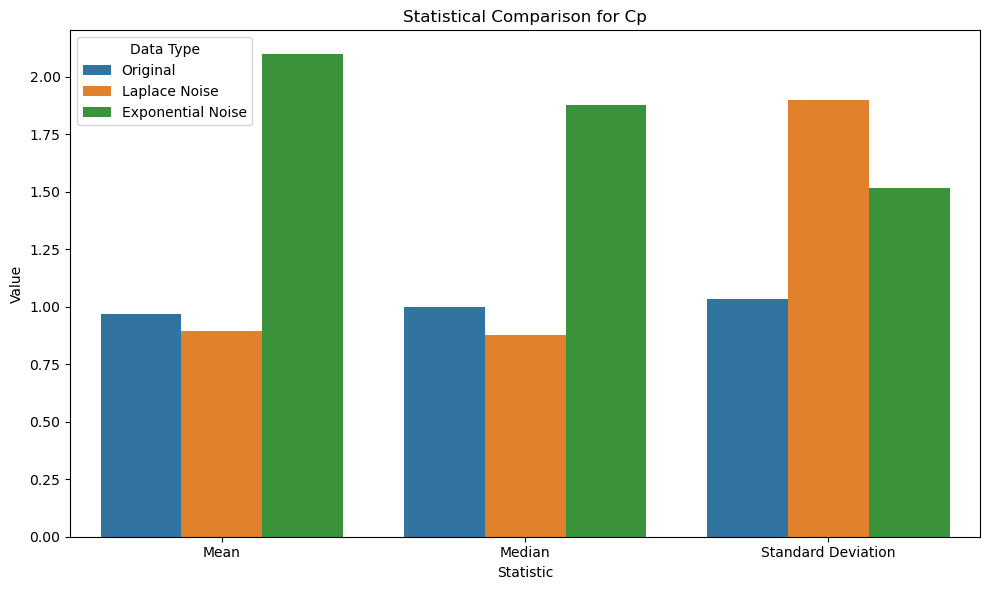

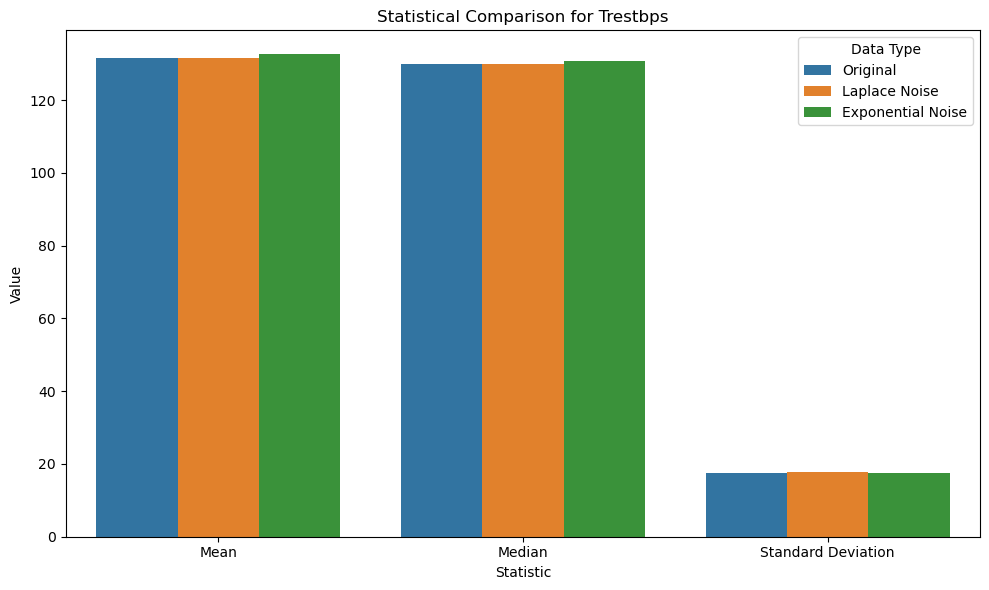

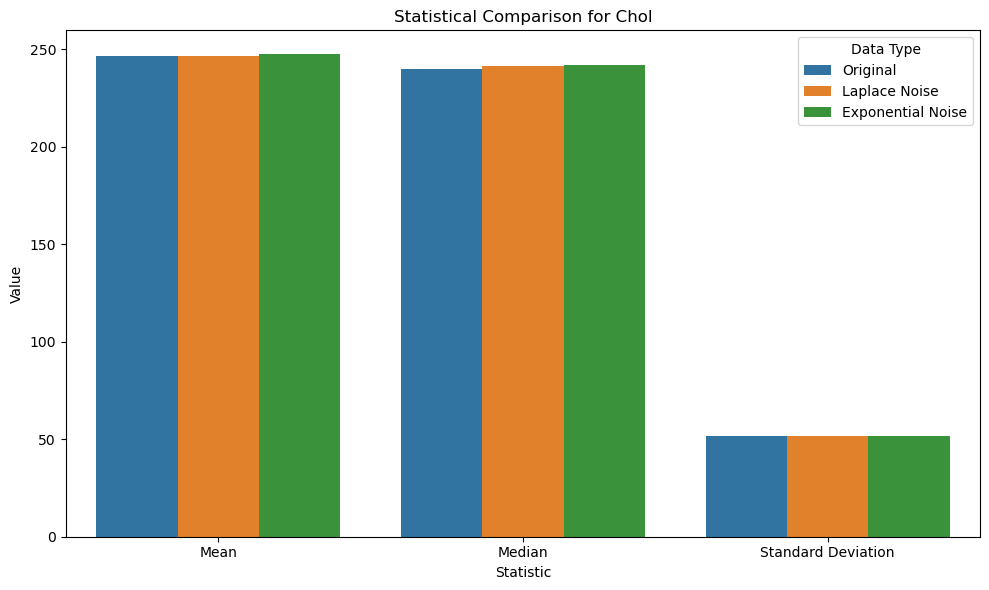

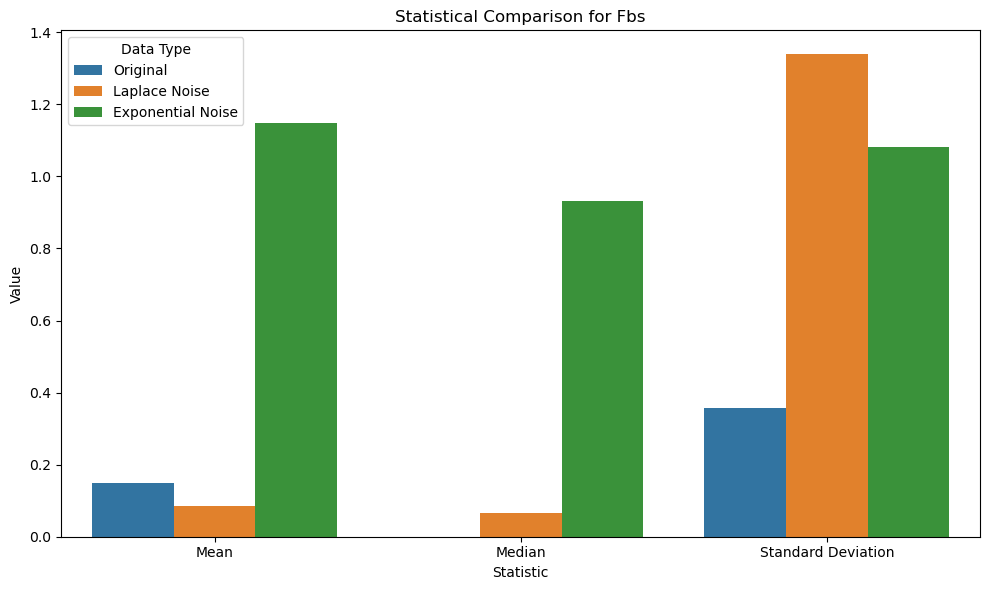

In [18]:
# Function to plot comparison bar plots for each feature
def plot_feature_stats(feature, data):
    feature_data = data[data['Feature'] == feature]
    feature_data_melted = feature_data.melt(id_vars=['Feature', 'Type'], var_name='Statistic', value_name='Value')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Statistic', y='Value', hue='Type', data=feature_data_melted)
    plt.title(f'Statistical Comparison for {feature.capitalize()}')
    plt.xlabel('Statistic')
    plt.ylabel('Value')
    plt.legend(title='Data Type')
    plt.tight_layout()
    plt.show()

# Plotting for each of the first five features
for feature in features:
    plot_feature_stats(feature, combined_stats_df)


In [19]:
# Function to plot individual histograms for each data type for a feature
def plot_individual_histograms(feature, original_data, laplace_data, exponential_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(f'Distributions for {feature.capitalize()}')
    
    # Original data histogram
    plt.subplot(1, 3, 1)
    sns.histplot(original_data, ax=axes[0], color="blue", kde=True, bins=30)
    axes[0].set_title('Original Data')
    axes[0].set_xlabel(feature.capitalize())
    axes[0].set_ylabel('Frequency')
    
    # Laplace noise data histogram
    plt.subplot(1, 3, 2)
    sns.histplot(laplace_data, ax=axes[1], color="red", kde=True, bins=30)
    axes[1].set_title('Laplace Noise Data')
    axes[1].set_xlabel(feature.capitalize())
    axes[1].set_ylabel('Frequency')
    
    # Exponential noise data histogram
    plt.subplot(1, 3, 3)
    sns.histplot(exponential_data, ax=axes[2], color="green", kde=True, bins=30)
    axes[2].set_title('Exponential Noise Data')
    axes[2].set_xlabel(feature.capitalize())
    axes[2].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    

In [20]:
# Generating separate histograms for the 'Age' feature
plot_individual_histograms('age', df['age'], apply_laplace_mechanism(df['age'], 1), apply_exponential_mechanism(df['age'],

SyntaxError: incomplete input (2623708773.py, line 2)

In [ ]:
# Looping through each feature to generate histograms
for feature in features[1:]:  # Skipping 'age' as it's already done
    original_data = df[feature]
    laplace_data = apply_laplace_mechanism(original_data, 1)
    exponential_data = apply_exponential_mechanism(original_data, 1)
    
    plot_individual_histograms(feature, original_data, laplace_data, exponential_data)